In [1]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)
from sklearn.model_selection import train_test_split

In [2]:
from functools import partial
from sklearn.model_selection import (cross_validate,
                                     KFold,
                                     ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [37]:
import matplotlib.pyplot as plt

# 5

## (a)

In [3]:
default = load_data("Default")

In [4]:
default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


## (b)

In [5]:
default_train, default_Valid = train_test_split(default,
                                          test_size=5000,
                                          random_state=0)

In [6]:
def_vars = MS(["balance", "income"])
X_train = def_vars.fit_transform(default_train)
y_train = default_train.default == "Yes"
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-11.389600,0.635000,-17.935,0.000
balance,0.005600,0.000000,16.792,0.000
income,0.000016,0.000007,2.151,0.031


In [7]:
X_valid = def_vars.transform(default_Valid)
probs = results.predict(X_valid)

In [8]:
labels = np.array(["No"] * 5000)
labels[probs > 0.5] = "Yes"  
1 - np.mean(labels == default_Valid.default)

0.03979999999999995

In [9]:
np.mean(labels == default_Valid.default)

0.9602

## (c)

In [10]:
default_train, default_Valid = train_test_split(default,
                                          test_size=5000,
                                          random_state=1)
def_vars = MS(["balance", "income"])
X_train = def_vars.fit_transform(default_train)
y_train = default_train.default == "Yes"
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()
X_valid = def_vars.transform(default_Valid)
probs = results.predict(X_valid)
labels = np.array(["No"] * 5000)
labels[probs > 0.5] = "Yes"  
1 - np.mean(labels == default_Valid.default)

0.036599999999999966

In [11]:
default_train, default_Valid = train_test_split(default,
                                          test_size=5000,
                                          random_state=2)
def_vars = MS(["balance", "income"])
X_train = def_vars.fit_transform(default_train)
y_train = default_train.default == "Yes"
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()
X_valid = def_vars.transform(default_Valid)
probs = results.predict(X_valid)
labels = np.array(["No"] * 5000)
labels[probs > 0.5] = "Yes"  
1 - np.mean(labels == default_Valid.default)

0.03520000000000001

In [12]:
default_train, default_Valid = train_test_split(default,
                                          test_size=5000,
                                          random_state=3)
def_vars = MS(["balance", "income"])
X_train = def_vars.fit_transform(default_train)
y_train = default_train.default == "Yes"
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()
X_valid = def_vars.transform(default_Valid)
probs = results.predict(X_valid)
labels = np.array(["No"] * 5000)
labels[probs > 0.5] = "Yes"  
1 - np.mean(labels == default_Valid.default)

0.036599999999999966

## (d)

In [13]:
import pandas as pd
default_train, default_Valid = train_test_split(default,
                                          test_size=5000,
                                          random_state=0)

def_vars = MS(["balance", "income", "student"])
X_train = def_vars.fit_transform(default_train)
X_train = pd.get_dummies(X_train, columns=['student'], drop_first = True)
y_train = default_train.default == "Yes"
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()
X_valid = def_vars.transform(default_Valid)
X_valid = pd.get_dummies(X_valid, columns=['student'], drop_first = True)
probs = results.predict(X_valid)
labels = np.array(["No"] * 5000)
labels[probs > 0.5] = "Yes"  
1 - np.mean(labels == default_Valid.default)

0.03979999999999995

# 7

## (a)

In [14]:
Smarket = load_data("Smarket")
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [15]:
model = MS(["Lag1", "Lag2"]).fit(Smarket)
X = model.fit_transform(Smarket)
y = Smarket.Direction == "Up"
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0742,0.057,1.310,0.190
Lag1,-0.0715,0.050,-1.427,0.153
Lag2,-0.0445,0.050,-0.890,0.374


## (b)

In [19]:
model = MS(["Lag1", "Lag2"]).fit(Smarket)
X = model.fit_transform(Smarket)
y = Smarket.Direction == "Up"
glm = sm.GLM(y[1:],
             X.loc[1:],
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0727,0.057,1.282,0.200
Lag1,-0.0720,0.050,-1.436,0.151
Lag2,-0.0443,0.050,-0.885,0.376


In [30]:
if (results.predict(X.loc[0]) > 0.5)[0]:
    prediction = True
else:
    prediction = False
prediction

True

In [21]:
y.loc[0]

True

## (d)

In [31]:
len(Smarket)

1250

In [34]:
preds = []
for i in range(len(Smarket)):
    model = MS(["Lag1", "Lag2"]).fit(Smarket)
    X = model.fit_transform(Smarket)
    y = Smarket.Direction == "Up"
    glm = sm.GLM(y.drop(i),
                 X.drop(i),
                 family=sm.families.Binomial())
    results = glm.fit()
    if (results.predict(X.loc[0]) > 0.5)[0]:
        pred = True
    else:
        pred = False
    if y.loc[i] == pred:
        preds.append(1)
    else:
        preds.append(0)

## (e)

In [35]:
np.mean(preds)

0.5184

# 8

## (a)

In [36]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 1 * x**2 + rng.normal(size=100)

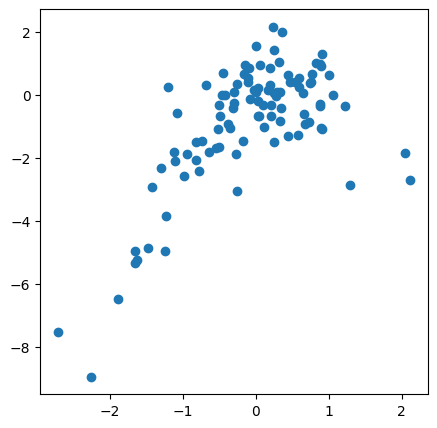

In [40]:
_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y)

## (b)

In [41]:
cv_error = np.zeros(4)
H = np.array(x)
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1, 5)):
    X = np.power.outer(H, np.arange(d+1))
    M_CV = cross_validate(M, X, y, cv=len(x))
    cv_error[i] = np.mean(M_CV["test_score"])
cv_error

array([2.42569784, 1.12293686, 1.30179655, 1.33239427])